# Pandas DataFrames

## Building DataFrames
Pandas DataFrames are the most widely used **in-memory representation** of complex data collections within Python. Here we summarize various ways of reading data to DataFrame.

### From dictionary to DataFrame

In [ ]:
hello = pd.DataFrame({'e':[1,2,3],'d':['a', 'b', 'c']}) 

### From numpy array to DataFrame

In [1]:
import pandas as pd
import numpy as np
var1 = np.array([137, 335, 172, 355, 303])

var2 = np.array([ 1.84,0.91, 4.104,6.661, 15.285])

var3 = np.array([2.89800e+00, 6.87000e-01, 8.32600e+00, 1.58200e+00, 1.10750e+02])

dic = {'var1':var1, 'var2':var2,'var3':var3}
data = pd.DataFrame(dic)

### From lists to DataFrame 
route map: create DataFrame from dictionary with pd.DataFrame(dict) -> create dictionary from tuple pairs with zip() function. 

In [20]:
import pandas as pd
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

zipped = zip(list_keys, list_values)
# The zip() function in Python 3 and above returns a special zip object, which is essentially 
# a generator. To disply the generator, convert the zip object to a list, and the print it.

#print(list(zipped))

data = dict(zipped) 
df = pd.DataFrame(data)
print(df)

print(list(zipped)) 
#Note the print sentence here or earlier will both print an empty list. This is because zipped is a 
#generator. After tranversing by the dict(),it is in the end of the zipped object. 

          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273
[]


### From pandas Series to DataFrame
Convert the Series x to a DataFrame and name the column x

In [ ]:
x = pd.DataFrame(x, columns=['x'])

### Building DataFrames with broadcasting

In [11]:
cities = ['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']

state = 'PA'

data = {'state':state, 'city':cities}

df = pd.DataFrame(data)

print(df)

               city state
0           Manheim    PA
1      Preston park    PA
2       Biglerville    PA
3           Indiana    PA
4      Curwensville    PA
5             Crown    PA
6      Harveys lake    PA
7   Mineral springs    PA
8         Cassville    PA
9        Hannastown    PA
10        Saltsburg    PA
11      Tunkhannock    PA
12       Pittsburgh    PA
13        Lemasters    PA
14       Great bend    PA


### Reading a flat file

In [ ]:
df1 = pd.read_csv(data_file)
new_labels = ['year', 'population']
df2 = pd.read_csv(data_file, header=0, names=new_labels) 
#names can be directly assigned to df2. Or use
#df2.columns = new_labels

In [ ]:
df1 = pd.read_csv('messy_stock_data.txt')
print(df1.head())

df2 = pd.read_csv('messy_stock_data.txt', delimiter=' ', header=3, comment="#")
# header = 3. The third row as header
print(df2.head())

Unlike the above examples we can have one type of separation. The single field in one column also has its own white-space separation. For this case, we need a special read_fwf for handling fixed width separation

In [ ]:
col_specification =[(0, 4), (5, 10), (11, 14), (16,21), (22,27), (28,34), (35,41), (42,47),
                      (48,54), (55,90)]
df_fuel = pd.read_fwf('fuel.txt', colspecs=col_specification)

In [ ]:
df = pd.read_csv('hello.txt',delim_whitespace=True,index_col=0) 
#Different length of whitespace

df = pd.read_csv('hello.txt',sep = '\s+', index_col=0) 
# can achieve the same as the above delim_whitespace = True

df = pd.read_csv('iris.txt',delimiter = '\t', header=None) 
#Because each header is not continuous. So do this. 
df.columns=['sepal length (cm)', 'sepal width (cm)' , 'petal length (cm)', 
            'petal width (cm)', 'species']

### Building DataFrame from copied data from web page
    ID  impact_force
20  A         1.612

21  A         0.605

22  A         0.327

First paste the contents to Excel, and then save it as txt or csv file. Then read in with pd.read_csv.
Note it is not necessary to save as .csv. Just a txt tab separated. The key is in read_csv, use sep = '\s+'. 

### Write DataFrame to file

In [ ]:
file_clean = 'file_clean'
df2.to_csv(file_clean, index=False)
df2.to_excel('file_clean.xlsx', index=False)

## Exploratory data analysis

0.8
19.0
<class 'pandas.core.series.Series'>


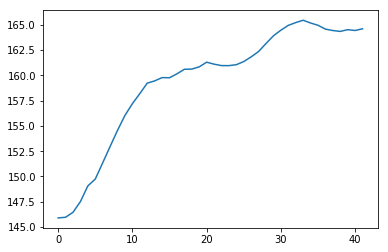

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
print(df['Engineering'].min())
print(df['Engineering'].max())
mean = df.mean(axis='columns')
mean.plot()
plt.show()

### Median vs mean
In many data sets, there can be large differences in the mean and median value due to the presence of outliers.

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


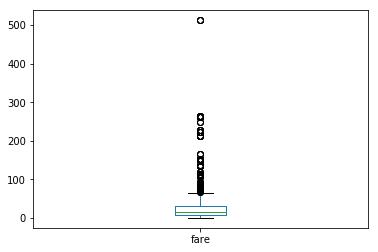

In [17]:
import pandas as pd
df = pd.read_csv("titanic.csv")
print(df.fare.describe())
df.fare.plot(kind='box')
plt.show()

### Quantiles
Compute the 5th and 95th percentiles of life expectancy over the entire dataset. 

208
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 218 columns]


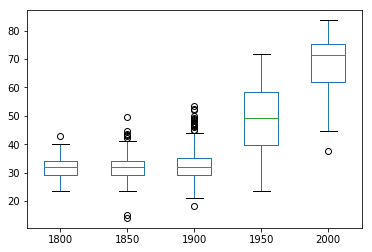

In [18]:
import pandas as pd
df = pd.read_csv("life_expectancy_at_birth.csv")
print(df['2015'].count())

# Print the 5th and 95th percentiles for all columns
print(df.quantile([0.05,0.95]))

years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

### Standard deviation of temperature

In [ ]:
print(january.mean(), march.mean())
print(january.std(), march.std())

### Separate and summarize

In [26]:
import pandas as pd
df = pd.read_csv("auto-mpg.csv")
global_mean = df.mean() 
#calculate mean of each columns (axis = 0). Also it calculates only the mean of numerical data types
global_std = df.std()

us =df[df['origin']=='US']

us_mean = us.mean()
us_std = us.std()

print(us_mean - global_mean)
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


### Separate and plot

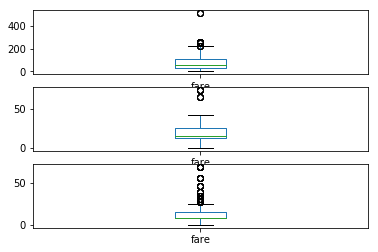

In [30]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')
plt.show()

## Case Study - Sunlight in Austin

### Re-assigning column names

In [2]:
import pandas as pd
df = pd.read_csv("NOAA_QCLCD_2011_hourly_13904.txt")
# Split on the comma to create a list: column_labels_list

column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type', 'altimeterFlag', 'junk']

column_labels_list = column_labels.split(",")
df.columns = column_labels_list
df_dropped = df.drop(list_to_drop, axis='columns')

print(df_dropped.head())


    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101   153           12        OVC049      10.00             51   
1  13904  20110101   253           12        OVC060      10.00             51   
2  13904  20110101   353           12        OVC065      10.00             50   
3  13904  20110101   453           12        BKN070      10.00             50   
4  13904  20110101   553           12        BKN065      10.00             49   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             37          3.0              14         -10.0   
1         10.6             37          2.9              13         -10.6   
2         10.0             38          3.1              17          -8.3   
3         10.0             37          2.8              15          -9.4   
4          9.4             37          2.8              17          -8.3   

  relative_humidity wind_speed wind_direction station_pr

### Cleaning and tidying datetime data
**Note the date and time are in two columns and also are with zeros (the first row for example). So we cannot easily use standard way to transfer it into datetime object**. We need some special treatment as below. 

In [3]:
df_dropped['date'] = df_dropped['date'].astype(str)
#Because it is only the date part but not the whole date-time, so we cannot use pd_to_datetime()

#print(df_dropped['Time'])
# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))
# See details of padding and formating in python folder. Because there is only one parameter for 
# format(), an index, e.g. 0 is neglected before : in '{:0>4}'. The 0 in '{:0>4}' is the padding
# element. > refers to right alignment.
#print(df_dropped['Time'])

date_string = df_dropped['date'] + df_dropped['Time']
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')
df_clean = df_dropped.set_index(date_times)
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   
2011-01-01 05:53:00  13904  20110101  0553           12        BKN065   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   
2011-01-01 05:53:00      10.00             49          9.4             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 01:53:00          3.0

### leaning the numeric columns
The numeric columns contain missing values labeled as 'M'. We now transform these columns such that they contain only numeric values and interpret missing data as NaN.

pd.to_numeric() converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument errors='coerce', one can force strings like 'M' to be interpreted as NaN.  
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input


In [4]:
print(df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00', 'dry_bulb_faren'])

df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

print(df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00', 'dry_bulb_faren'])

df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


### Signal min, max, median

In [5]:
print(df_clean['dry_bulb_faren'].median())
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


### Signal variance
**resample + aggregate is very similar to 'select column_name, aggregate() group by...**

In [6]:
import pandas as pd
df_climate = pd.read_csv('weather_data_austin_2010.csv', index_col='Date', parse_dates=True)

# Downsample df_clean by day and aggregate by mean: daily_mean_2011. Understand this by the 
# aggregating over subgroup in the group by in SQL. 
daily_mean_2011 = df_clean.resample('D').mean()  
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature'] 

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.330083921569873


### Sunny or cloudy
**Some ways of identifying values in a column:**
- For same values, use .loc and filter mask  
- For values contain only partial common strings, use .str.contains(). Regular expression might be helpful sometimes.
- In SQL, use LIKE, where we can also use regular expression.

In [20]:
sunny = df_clean.loc[df_clean['sky_condition']=='CLR']
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')] #overcast: cloudy

# Resample sunny and overcast, aggregating by maximum daily temperature. Original is hourly data
# Like "group by day" in SQL, i.e., each day is a group. There are so many days, so we have many
# max temperature.
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

print(len(sunny_daily_max))
print(len(overcast_daily_max))
#The numbers of sunny and cloudy days are different. Thus we cannot calculate their difference 
#day by day. Instead, calculate the difference of their mean.

print(sunny_daily_max.mean() - overcast_daily_max.mean())
# print(overcast.head())


365
362
Wban               0.000000
StationType        0.000000
visibility         0.174359
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


### Weekly average temperature and visibility

In [16]:
import matplotlib.pyplot as plt

weekly_mean = df_clean[['visibility','dry_bulb_faren']].resample('W').mean()
print(weekly_mean.corr())
weekly_mean.plot(subplots=True)
plt.show()

                visibility  dry_bulb_faren
visibility         1.00000         0.49004
dry_bulb_faren     0.49004         1.00000


In [79]:
df_clean['visibility']
weekly_mean = df_clean[['visibility','dry_bulb_faren']]
print(weekly_mean.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10336 entries, 2011-01-01 01:53:00 to 2011-12-31 23:53:00
Data columns (total 2 columns):
visibility        10324 non-null object
dry_bulb_faren    10325 non-null float64
dtypes: float64(1), object(1)
memory usage: 562.2+ KB
None


### Daily hours of clear sky

2011-01-01    0.478261
2011-01-02    0.291667
2011-01-03    0.115385
2011-01-04    0.000000
2011-01-05    0.034483
Freq: D, Name: sky_condition, dtype: float64


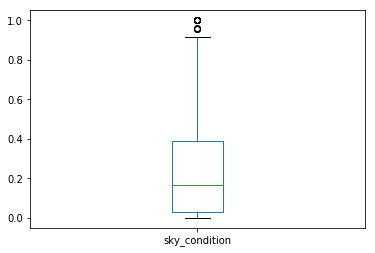

In [19]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean['sky_condition'] == 'CLR'
sunny_hours = sunny.resample('D').sum()
total_hours = sunny.resample('D').count()
sunny_fraction = sunny_hours / total_hours
sunny_fraction.plot(kind='box')
plt.show()

### Heat or humidity

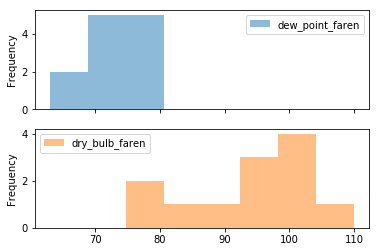

In [21]:
monthly_max = df_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)
plt.show()

### Probability of high temperatures

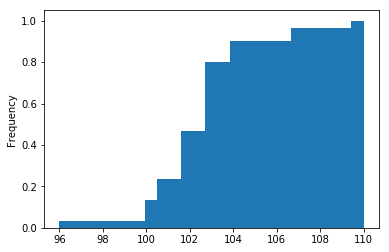

In [22]:
august_max = df_climate.loc['2010-Aug','Temperature'].max()
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()
august_2011_high = august_2011.loc[august_2011 > august_max]
august_2011_high.plot(kind='hist', normed=True, cumulative=True, bins=25)
plt.show()
